In [1]:
import numpy as np 
import sep

In [2]:
import astropy.io.fits 
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline 

rcParams['figure.figsize']=[10.,8.]

In [3]:
from astropy.io import fits
#file path 
fits_file_path = r"C:\Users\lilyk\Downloads\hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"

# Open the FITS file
with fits.open(fits_file_path, memmap=False) as hdul:
    # Access data from the primary HDU 
    data = hdul[0].data


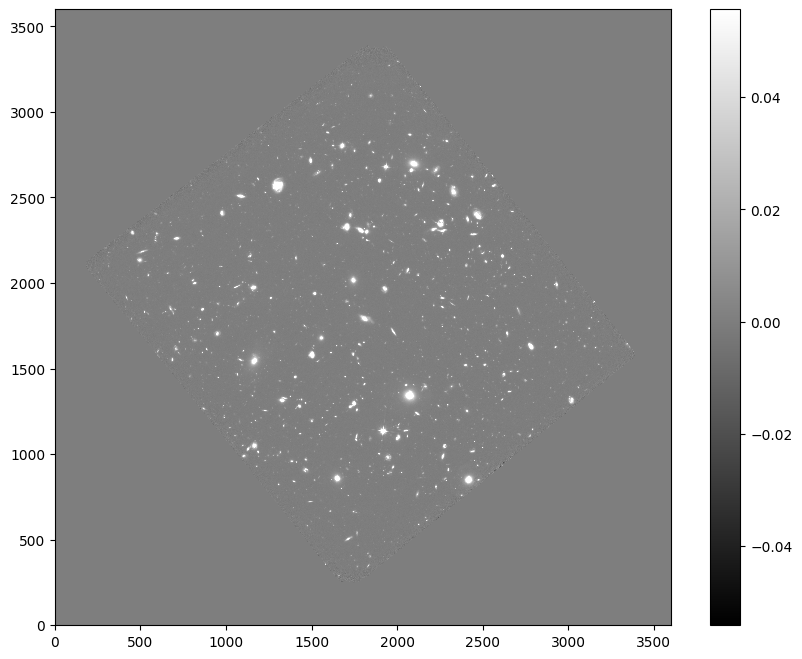

In [4]:
m, s= np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

data= data.byteswap(inplace=True).newbyteorder()

In [5]:
bkg= sep.Background(data)


In [6]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [7]:
bkg_image=bkg.back()

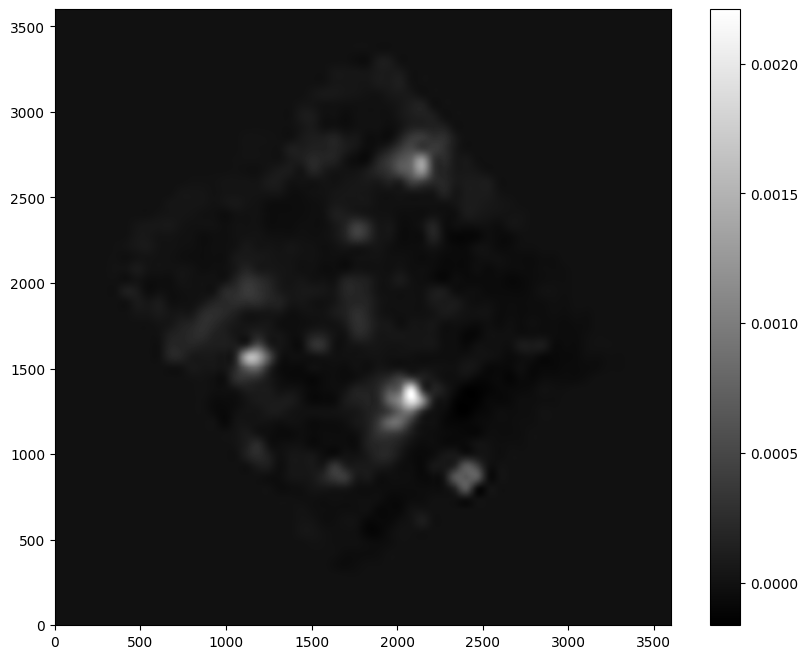

In [8]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [9]:
bkg_rms=bkg.rms()

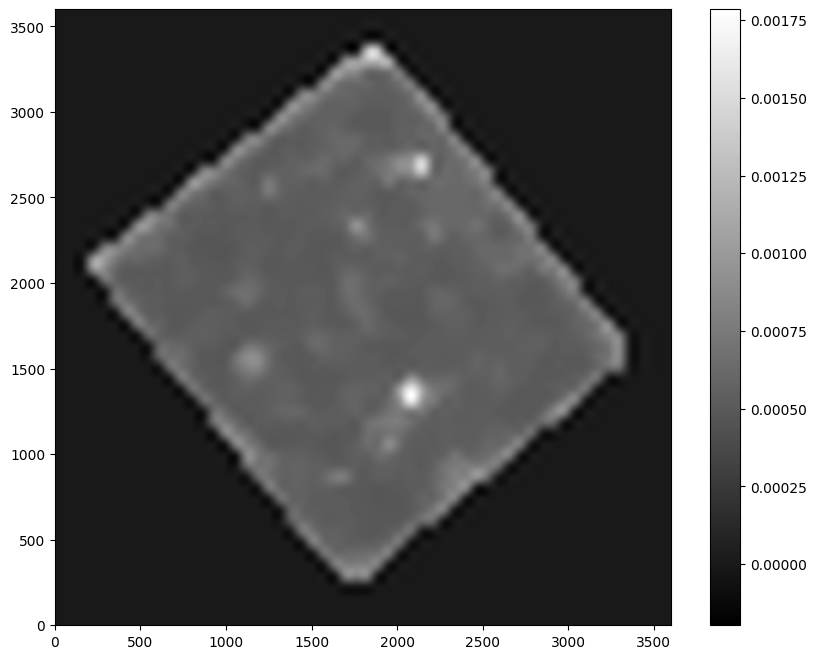

In [10]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [11]:
data_sub=data-bkg

In [12]:
objects= sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [13]:
len(objects)

8640

There are 8640 sources

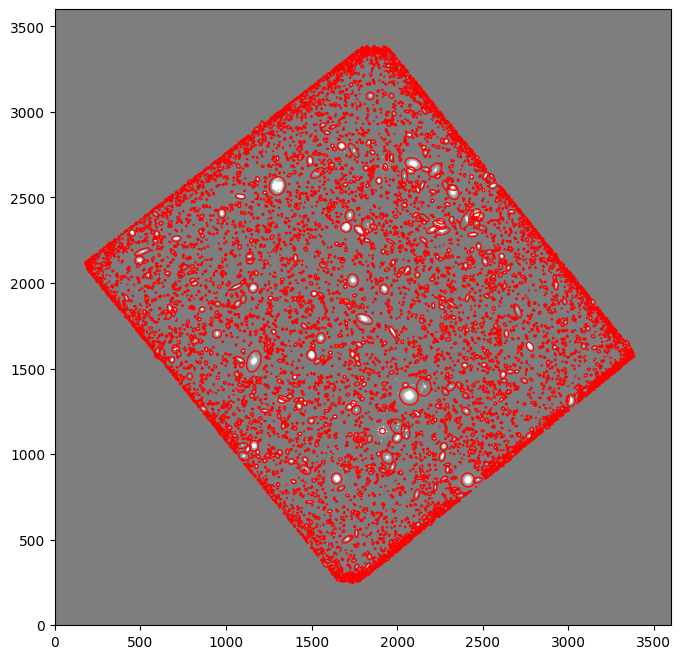

In [14]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [15]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [16]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [17]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


In [18]:
min_flux = np.min(flux)
max_flux = np.max(flux)

print(f"Minimum Flux: {min_flux}")
print(f"Maximum Flux: {max_flux}")


Minimum Flux: -1.061365427845663
Maximum Flux: 807.2972835731507


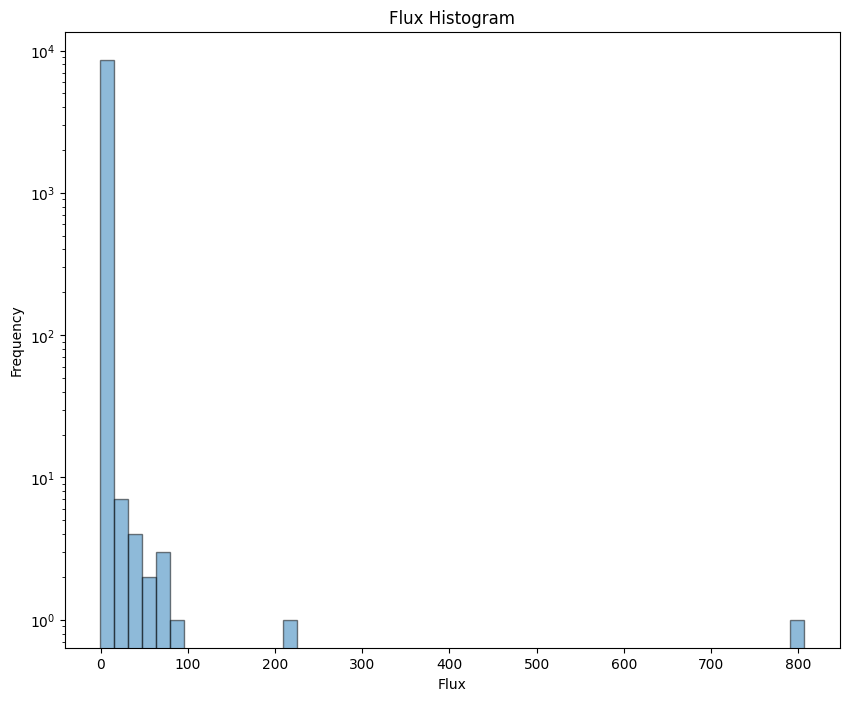

In [19]:
plt.hist(flux, bins=50, edgecolor='black', alpha=0.5, log=True)


plt.xlabel('Flux')
plt.ylabel('Frequency')
plt.title('Flux Histogram')


plt.show()

In [20]:
std_deviation = np.std(flux)
print("Standard Deviation:", std_deviation)

Standard Deviation: 9.243528029706706


In [21]:
mean_value = np.mean(flux)

print(f"mean: {mean_value}")


mean: 0.36185728037707154


In [22]:
positions = np.column_stack((objects['x'],objects['y']))

mean_flux = np.mean(flux)
median_flux = np.median(flux)
std_dev_flux = np.std(flux)


outlier_index = np.argmax(flux)
outlier_flux = flux[outlier_index]
outlier_position = positions[outlier_index]
outlier_std_devs_away = (outlier_flux - mean_flux) / std_dev_flux

# Print results
print(f"Mean Flux: {mean_flux}")
print(f"Median Flux: {median_flux}")
print(f"Standard Deviation of Fluxes: {std_dev_flux}")
print(f"Largest Outlier Flux: {outlier_flux}")
print(f"Outlier Position: {outlier_position}")
print(f"Outlier Standard Deviations Away from Mean: {outlier_std_devs_away}")

Mean Flux: 0.36185728037707154
Median Flux: 0.030960064365426664
Standard Deviation of Fluxes: 9.243528029706706
Largest Outlier Flux: 807.2972835731507
Outlier Position: [1914.25490949 1134.31648507]
Outlier Standard Deviations Away from Mean: 87.29734184820526


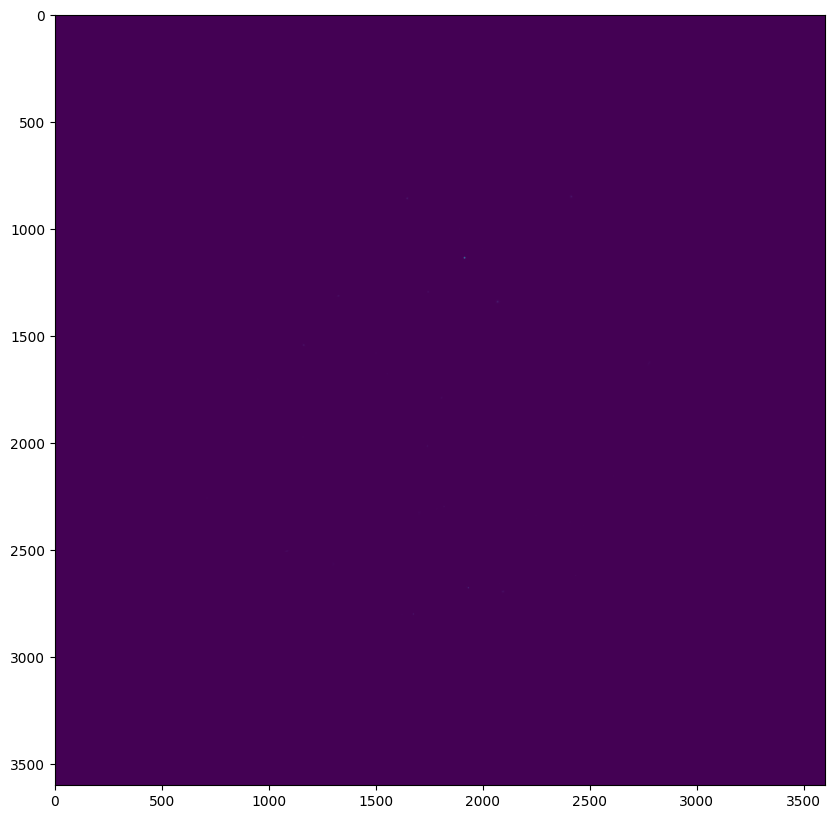

In [23]:
from astropy.io import fits

# Paths to the local FITS files
fdata_F105W = r"C:\Users\lilyk\Downloads\hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"
fdata_F125W = r"C:\Users\lilyk\Downloads\hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz (1).fits"
fdata_F160W = r"C:\Users\lilyk\Downloads\hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"

hdu_2= fits.open(fdata_F105W)
hdu_3=fits.open(fdata_F125W)
hdu_4=fits.open(fdata_F160W)

data_2=hdu_2[0].data
data_3=hdu_3[0].data
data_4=hdu_4[0].data

f=plt.figure(figsize=(10,10))
plt.imshow(data_2)


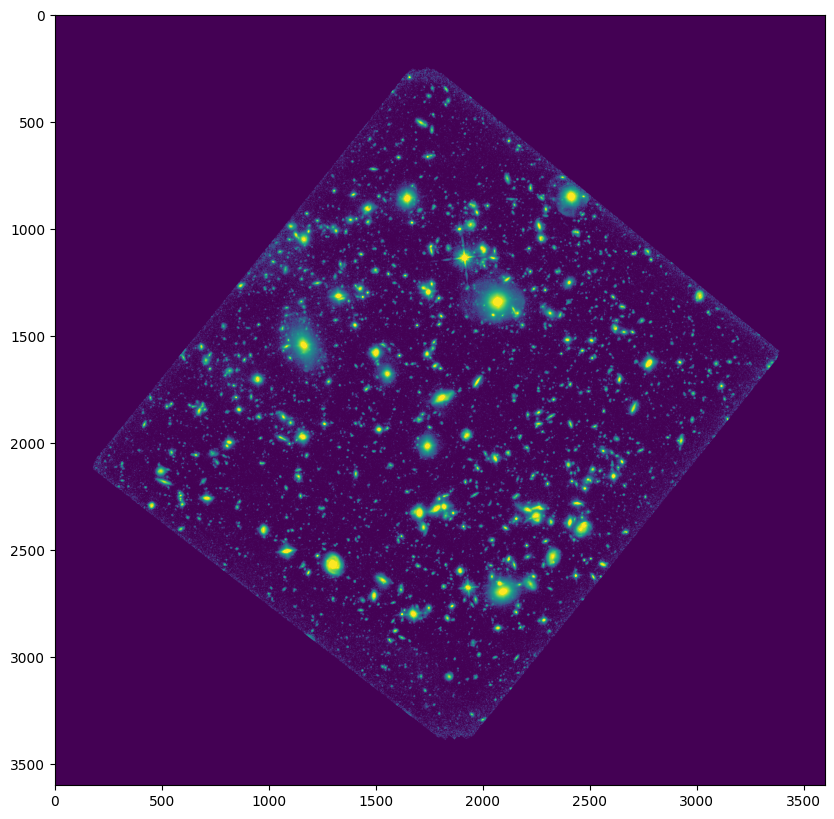

In [24]:
def rescale_image(data):
    pdata_tmp= data.copy()
    m= np.nanmean(pdata_tmp)
    vplmin=m/2.
    vpmin=np.log10(vplmin)
    vpmax= np.log10(m * 100.)
    pdata_tmp[pdata_tmp < vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp, vpmin, vpmax

def fits_quicklook(data, fnx=10, fny=10):
    f = plt.figure(figsize=(fnx, fny))
    pdata_tmp, vpmin, vpmax = rescale_image(data)
    plt.imshow(pdata_tmp, vmin=vpmin, vmax=vpmax)

fits_quicklook(data_2)


In [25]:
data_2_res, d2min, d2max = rescale_image(data_2)
data_3_res, d3min, d3max= rescale_image(data_3)
data_4_res, d4min, d4max= rescale_image(data_4)

In [26]:
data_2_res[data_2_res<d2min]= d2min
data_2_res[data_2_res>d2max]= d2max
data_3_res[data_3_res<d2min]= d3min
data_3_res[data_3_res>d2max]= d3max
data_4_res[data_4_res<d2min]= d4min
data_4_res[data_4_res>d2max]= d4max

In [27]:
rgb= np.zeros((data_2_res.shape[0], data_2_res.shape[1], 3))
rgb[:,:,0] = (data_2_res-d2min)/(d2max-d2min)
rgb[:,:,1] = (data_3_res-d3min)/(d3max-d3min)
rgb[:,:,2] = (data_4_res-d4min)/(d4max-d4min)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


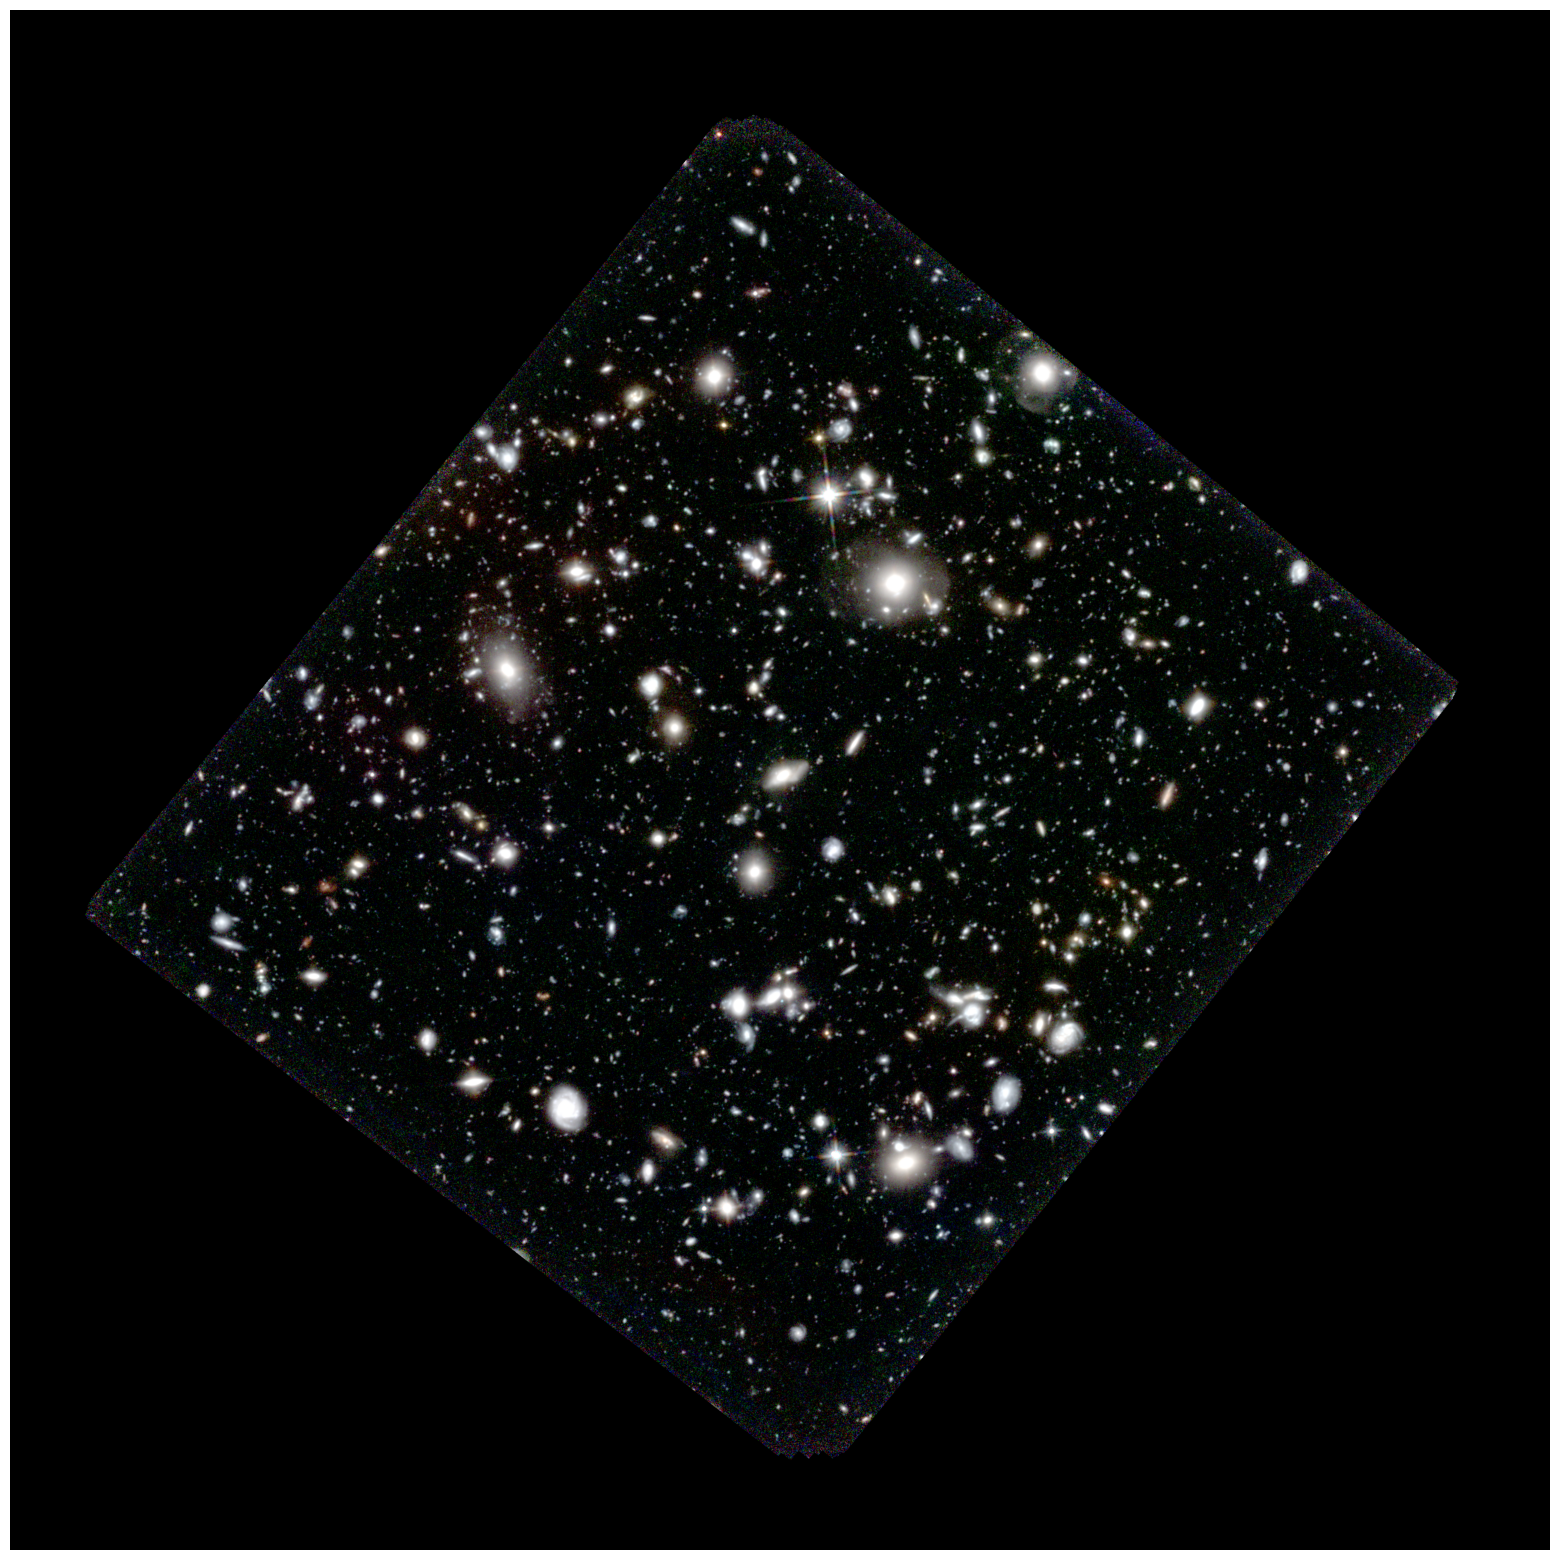

In [28]:
f, ax = plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb)
plt.savefig('hudf_image.png',bbox_inches='tight',pad_inches=0, dpi=600)